## Introduction

Customer retention is a measure of how many customers stay with your business for the long term. It is crucial for sustained business growth. According to a study by Harvard Business School (Aurélie Lemmens and Sunil Gupta) titled "Managing Churn to Maximize Profits," customer defection is a global phenomenon, with estimated annual churn rates of 20% for credit cards in the United States and 20%–38% for mobile phone carriers in Europe (Bobbier 2013). As customer acquisition costs rise, managing customer churn has become crucial for company profitability. McKinsey & Co. estimates that reducing churn could increase earnings of a typical U.S. wireless carrier by nearly 10% (Braff, et al. 2003). The study highlights that top executives prioritize customer retention, often investing in sophisticated, proactive churn management programs that target potential churners with incentives such as special offers and discounts (Ganesh, et al. 2000).

However, traditional approaches focusing on churn prediction and targeting customers based on churn risk may not be effective. Recent research suggests ranking customers based on their sensitivity to interventions, regardless of their churn risk (Ascarza 2018, Guelman, et al. 2012). Despite this, existing approaches often overlook the ultimate goal of maximizing profit from retention campaigns. They fail to consider the profit impacts of interventions, which can be estimated based on the intervention’s impact on churn probability, post-campaign cash flows, and cost. By focusing on churn lift rather than profit lift, these approaches might target customers for whom the retention effect is positive but the profit lift is negative.

Additionally, prediction errors can have varying financial impacts, with incorrect predictions for high-profit-lift customers being more costly. Churn models attempt to minimize misclassifications of all customers’ churn, regardless of their profit potential. Likewise, uplift models aim at estimating each customer’s conditional average treatment effect as accurately as possible. In reality, not all customers are equally valuable, and incorrectly predicting the churn risk or lift would be costlier for some customers than others.

## Reference

- [Managing Churn to Maximize Profits](https://www.hbs.edu/ris/Publication%20Files/14-020_2d6c9da0-94d3-4dd5-9952-d81feb432f61.pdf)

## Problem Statement and Solution Approach

In order to solve and optimize this problem and situation, through data science and deploying statistical methods, artificial intelligence technologies (machine learning models and statistics/mathematical methods), we will train a model on a dataset of a company to best predict customer churn and develop recommendations accordingly. This will help optimize profit and increase customer retention, contributing to the success of the company.


## Objective

The objective of this project is to analyze customer data from a telecom company to predict customer churn and identify key factors influencing customer decisions to leave the service. By leveraging advanced data analysis and machine learning techniques, we aim to:

- Analyze historical customer data to identify patterns and trends related to churn.
- Develop a predictive model to forecast potential customer churn.
- Identify the most significant factors contributing to customer churn.
- Create visualizations to effectively communicate findings to stakeholders.
- Propose data-driven strategies to reduce churn rates and improve customer retention.


## Methodology

The methodology for this project will include the following steps:

1. **Data Collection and Preprocessing**
2. **Exploratory Data Analysis (EDA)**
3. **Feature Engineering**
4. **Model Development and Evaluation**
5. **Results Interpretation and Visualization**
6. **Strategy Formulation**


## Tools and Technologies

The tools and technologies that will be used in this project include:

- **Python** for data manipulation and analysis
- **NumPy and Pandas** for efficient data handling
- **Matplotlib and Seaborn** for data visualization
- **Scikit-learn** for machine learning model development


## Dataset

The dataset that will be used to train the model and optimize the business is:

**Dataset:**
- Telco Customer Churn (kaggle.com)

The data set includes information about:
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

For sure, in any real-world case, we can utilize any company’s dataset that could have such information to do the same functionalities and optimize the business.
## Reference

- [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)


## Expected Outcomes

The expected outcomes of this project include:

- A predictive model for customer churn
- Actionable insights on factors influencing customer decisions
- Data-driven recommendations for reducing churn rates
- Clear visualizations for effective communication of findings


# Import required libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


# Load the dataset and Display Few rows and basic info

In [3]:
# Load the dataset and Display Few rows and basic info
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Interpretation and Reasoning
The output presents a DataFrame with 7043 entries and 21 columns, indicating a well-structured dataset with no missing values. The data types are appropriately assigned, with 'object' for categorical variables, 'int64' for integers, and 'float64' for floating-point numbers. To facilitate analysis and model building, several variables are suitable for feature encoding and engineering. Specifically, 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', and 'Churn' should be encoded from object to numerical formats to enable mathematical operations and improve model interpretability. Additionally, 'TotalCharges', currently an object, should be converted to a numerical type (likely float64) to accurately reflect the cumulative charges and enable arithmetic operations. These transformations will enhance the dataset's usability for machine learning algorithms and statistical analysis.

In [6]:
# Convert 'TotalCharges' to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Encoding categorical variables using one-hot encoding
categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'Churn'
]

df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [7]:
# Display the first few rows of the transformed DataFrame
df.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,False
1,5575-GNVDE,0,34,56.95,1889.50,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
2,3668-QPYBK,0,2,53.85,108.15,True,False,False,True,False,...,False,False,False,False,False,True,False,False,True,True
3,7795-CFOCW,0,45,42.30,1840.75,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,9237-HQITU,0,2,70.70,151.65,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,True


In [8]:
# Check the data types and ensure no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   tenure                                 7043 non-null   int64  
 3   MonthlyCharges                         7043 non-null   float64
 4   TotalCharges                           7032 non-null   float64
 5   gender_Male                            7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

# Interpretation and Reasoning
Based on our data preprocessing, we now have a dataset with 32 columns, mostly encoded as boolean types for categorical variables. The numeric features (SeniorCitizen, tenure, MonthlyCharges, and TotalCharges) remain as int64 or float64. Notably, TotalCharges has 11 missing values that need to be addressed. The customerID column, still in object format, isn't necessary for our analysis and can be dropped. Our next steps should focus on handling the missing values in TotalCharges, performing exploratory data analysis to understand the relationships between variables, and preparing the data for model development by scaling numeric features if needed.
For our next step, let's handle the missing values in TotalCharges and drop the customerID column.

In [9]:
# Drop customerID column
df = df.drop('customerID', axis=1)

# Handle missing values in TotalCharges
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

# Verify changes
print(df.isnull().sum())
print(df.shape)

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMo

The preprocessing steps have been successful. We now have a clean dataset with 7043 rows and 31 columns, including our target variable (Churn_Yes). All missing values have been addressed, and we've removed the unnecessary customerID column. This puts us in a good position to begin our exploratory data analysis (EDA).
For our EDA, let's start by examining the distribution of our target variable and its relationship with some key numeric features. We'll create visualizations to help us understand these relationships better.

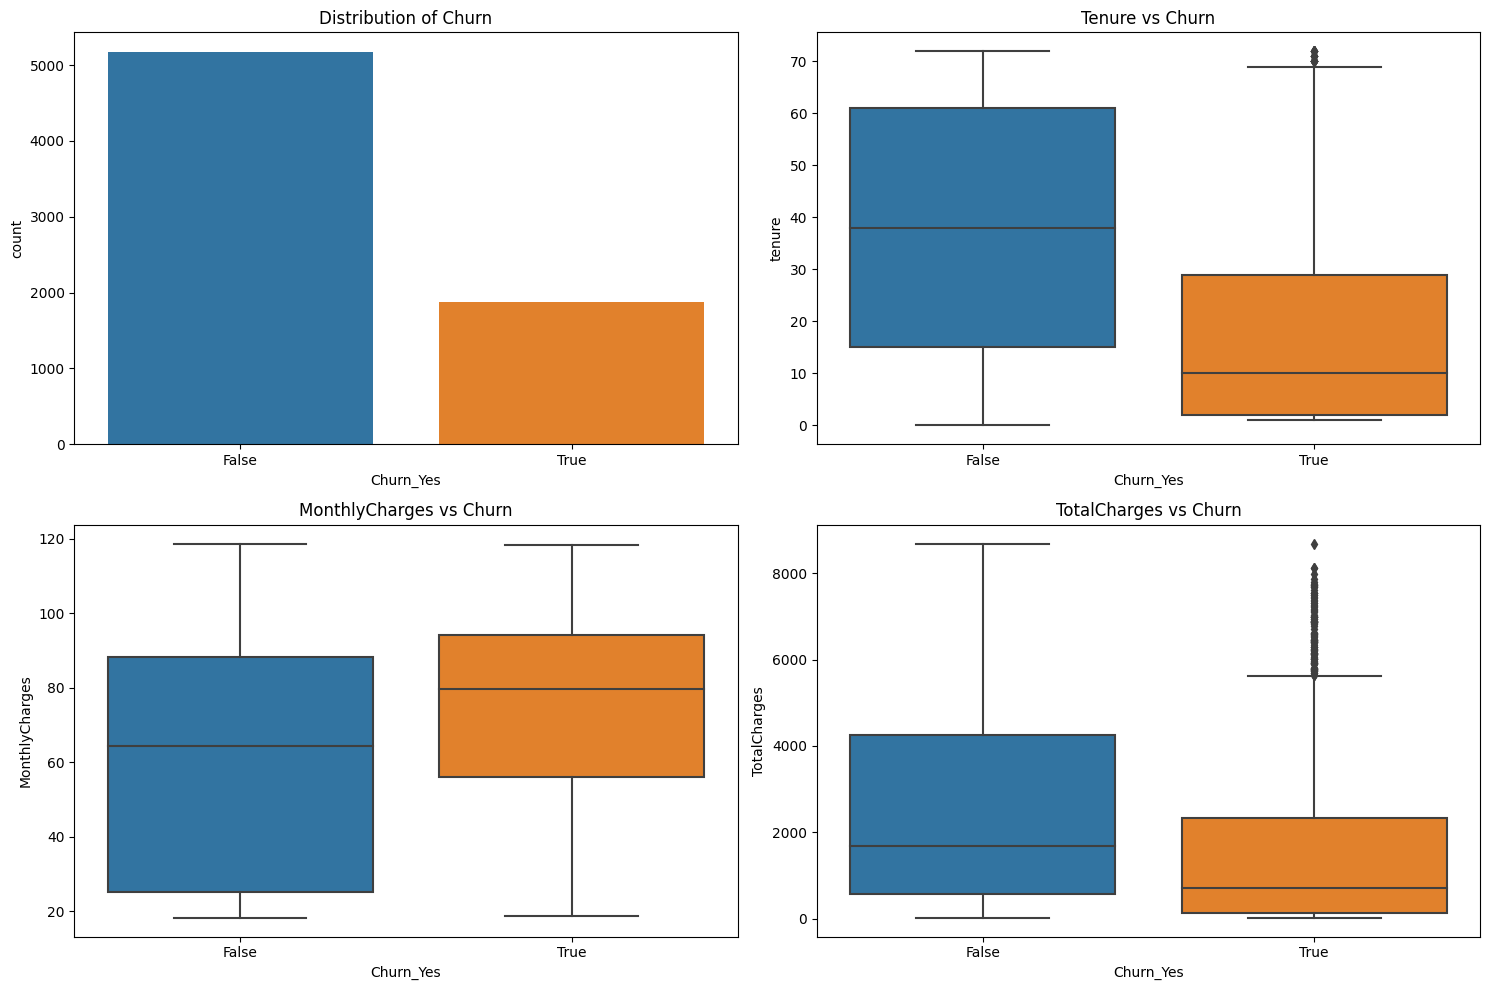

Churn Rate: 26.54%


In [10]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))
# Plot 1: Distribution of Churn
plt.subplot(2, 2, 1)
sns.countplot(x='Churn_Yes', data=df)
plt.title('Distribution of Churn')

# Plot 2: Tenure vs Churn
plt.subplot(2, 2, 2)
sns.boxplot(x='Churn_Yes', y='tenure', data=df)
plt.title('Tenure vs Churn')

# Plot 3: MonthlyCharges vs Churn
plt.subplot(2, 2, 3)
sns.boxplot(x='Churn_Yes', y='MonthlyCharges', data=df)
plt.title('MonthlyCharges vs Churn')

# Plot 4: TotalCharges vs Churn
plt.subplot(2, 2, 4)
sns.boxplot(x='Churn_Yes', y='TotalCharges', data=df)
plt.title('TotalCharges vs Churn')

plt.tight_layout()
plt.show()

# Calculate and print churn rate
churn_rate = df['Churn_Yes'].mean()
print(f"Churn Rate: {churn_rate:.2%}")

The exploratory data analysis reveals crucial insights into customer churn patterns. The distribution plot shows a clear imbalance in our target variable, with only 26.54% of customers churning. This imbalance is significant and will need to be addressed in our modeling phase to ensure our predictive models aren't biased towards the majority class. The relatively low churn rate of 26.54% suggests that while customer retention is generally good, there's still substantial room for improvement in reducing churn.
The relationship between churn and other variables provides valuable insights. Tenure appears to be a strong indicator of churn, with customers who churn typically having shorter tenures. This suggests that the initial period of customer engagement is critical for retention. Interestingly, monthly charges tend to be higher for customers who churn, indicating that price sensitivity could be a factor in customer decisions to leave. However, total charges are generally lower for churned customers, likely due to their shorter tenure. These observations hint at a complex interplay between service duration, pricing, and customer retention.
Given these insights, our next steps will focus on deeper analysis of feature importance and preparation for model development. We'll investigate the correlation between our features, particularly focusing on how different services and contract types relate to churn. We'll also need to address the class imbalance in our target variable, possibly through techniques like oversampling or undersampling. Finally, we'll prepare our data for modeling by scaling our numerical features and splitting our data into training and testing sets. This will set the stage for building and comparing different machine learning models to predict customer churn.

# Examining the correlation between our features and investigating how different services and contract types relate to churn

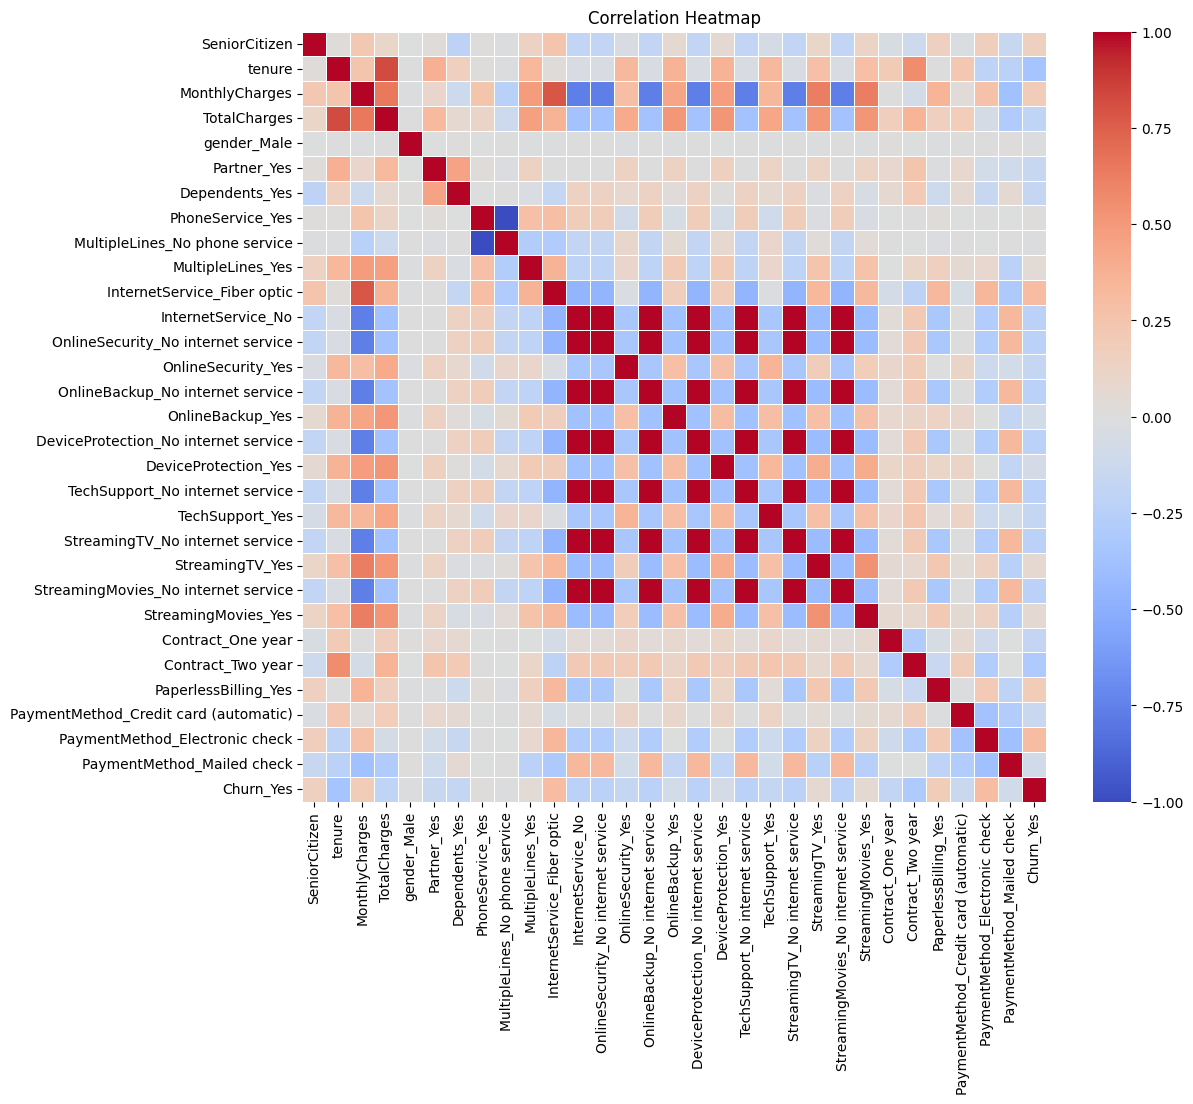

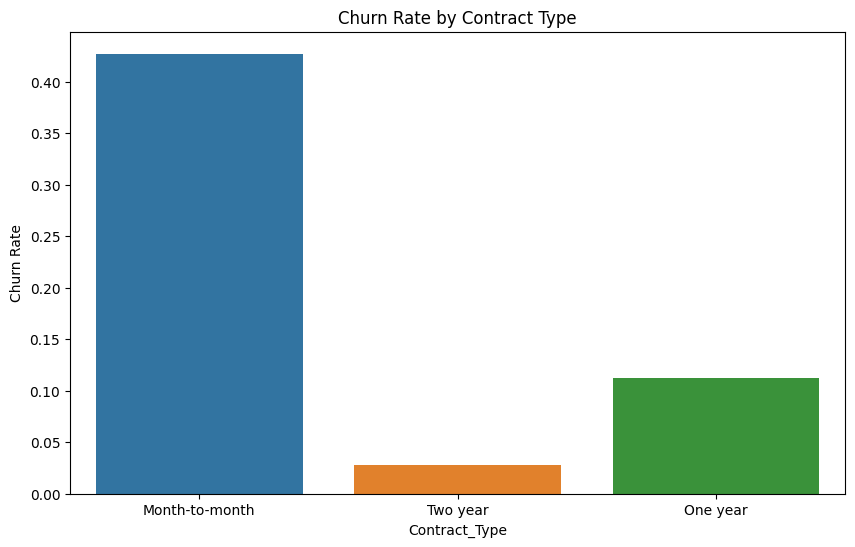

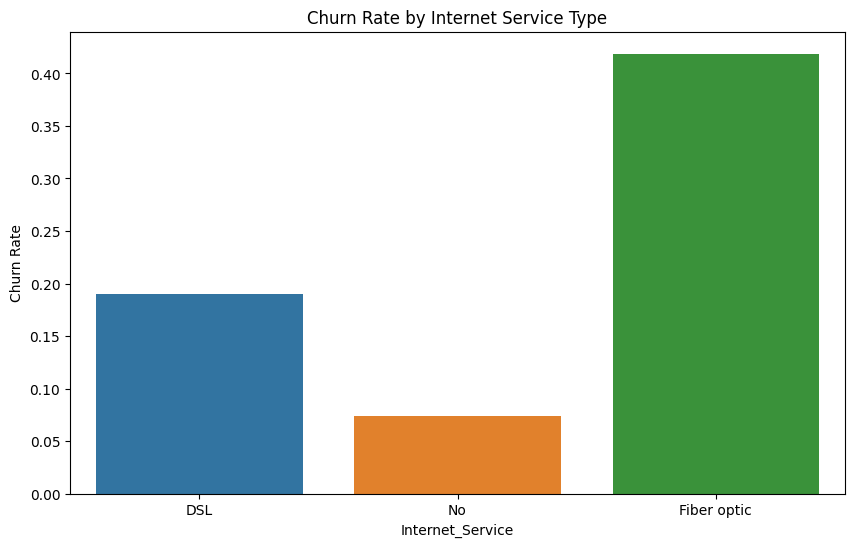

   Churn_Yes   Contract_Type
0   0.427097  Month-to-month
1   0.028319        Two year
2   0.112695        One year
   Churn_Yes Internet_Service
0   0.189591              DSL
1   0.074050               No
2   0.418928      Fiber optic


In [11]:
# Calculate correlation matrix
corr_matrix = df.corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Analyze how contract types relate to churn
contract_churn = df.groupby(['Contract_One year', 'Contract_Two year'])['Churn_Yes'].mean().reset_index()
contract_churn['Contract_Type'] = contract_churn.apply(lambda row: 'Month-to-month' if row['Contract_One year'] == 0 and row['Contract_Two year'] == 0 else ('One year' if row['Contract_One year'] == 1 else 'Two year'), axis=1)
contract_churn = contract_churn.drop(['Contract_One year', 'Contract_Two year'], axis=1)

plt.figure(figsize=(10, 6))
sns.barplot(x='Contract_Type', y='Churn_Yes', data=contract_churn)
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.show()

# Analyze how internet service types relate to churn
internet_churn = df.groupby(['InternetService_Fiber optic', 'InternetService_No'])['Churn_Yes'].mean().reset_index()
internet_churn['Internet_Service'] = internet_churn.apply(lambda row: 'DSL' if row['InternetService_Fiber optic'] == 0 and row['InternetService_No'] == 0 else ('Fiber optic' if row['InternetService_Fiber optic'] == 1 else 'No'), axis=1)
internet_churn = internet_churn.drop(['InternetService_Fiber optic', 'InternetService_No'], axis=1)

plt.figure(figsize=(10, 6))
sns.barplot(x='Internet_Service', y='Churn_Yes', data=internet_churn)
plt.title('Churn Rate by Internet Service Type')
plt.ylabel('Churn Rate')
plt.show()

print(contract_churn)
print(internet_churn)

The analysis of churn rates by contract type reveals a significant trend: customers with month-to-month contracts have the highest churn rate at 42.71%, while those with two-year contracts have the lowest at 2.83%. One-year contracts fall in between at 11.27%. This suggests that longer-term contracts are associated with lower churn rates, likely due to the commitment they require and potentially more favorable terms for customers willing to commit for longer periods.
Examining churn rates by internet service type shows that customers with fiber optic service have the highest churn rate at 41.89%, followed by DSL at 18.96%. Interestingly, customers with no internet service have the lowest churn rate at 7.41%. This could indicate that while fiber optic service might be attractive to customers initially, there may be issues with service quality, pricing, or unmet expectations leading to higher churn. The low churn rate for customers without internet service suggests that simpler service packages might be more stable, or that these customers have different needs and expectations.
# Next steps:

Prepare the data for modeling by scaling numerical features.
Address the class imbalance in the target variable.
Split the data into training and testing sets.
Develop and compare different machine learning models for predicting churn.

In [12]:
from imblearn.over_sampling import SMOTE

# Identify numerical columns
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Separate features and target variable
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the shape of our training and testing sets
print("Shape of training set:", X_train_resampled.shape)
print("Shape of testing set:", X_test.shape)
print("Distribution of target variable in training set:")
print(y_train_resampled.value_counts(normalize=True))

Shape of training set: (8276, 30)
Shape of testing set: (1409, 30)
Distribution of target variable in training set:
Churn_Yes
False    0.5
True     0.5
Name: proportion, dtype: float64


The data preparation phase has been completed successfully. Our training set now consists of 8,276 samples with 30 features, while the testing set contains 1,409 samples. The SMOTE technique has effectively balanced our training data, with an equal distribution of churned and non-churned customers (50% each). This balance will help our models learn to predict both classes equally well, addressing the initial class imbalance we observed.
Our next step is to develop and evaluate our first predictive model. We'll start with a logistic regression model, which is often a good baseline for binary classification problems like customer churn prediction. We'll train the model on our balanced dataset, make predictions on the test set, and evaluate its performance using various metrics including accuracy, precision, recall, and F1-score.

Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.77      0.83      1036
        True       0.54      0.76      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409



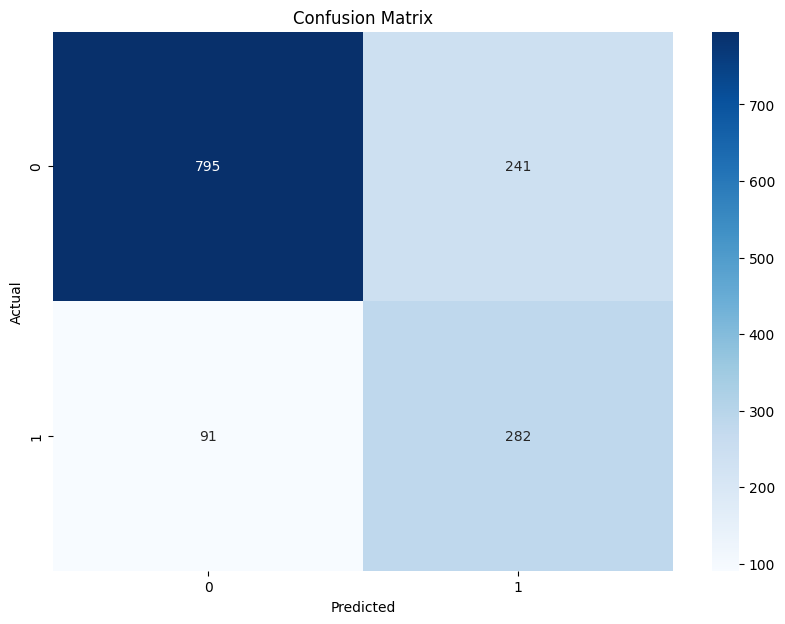

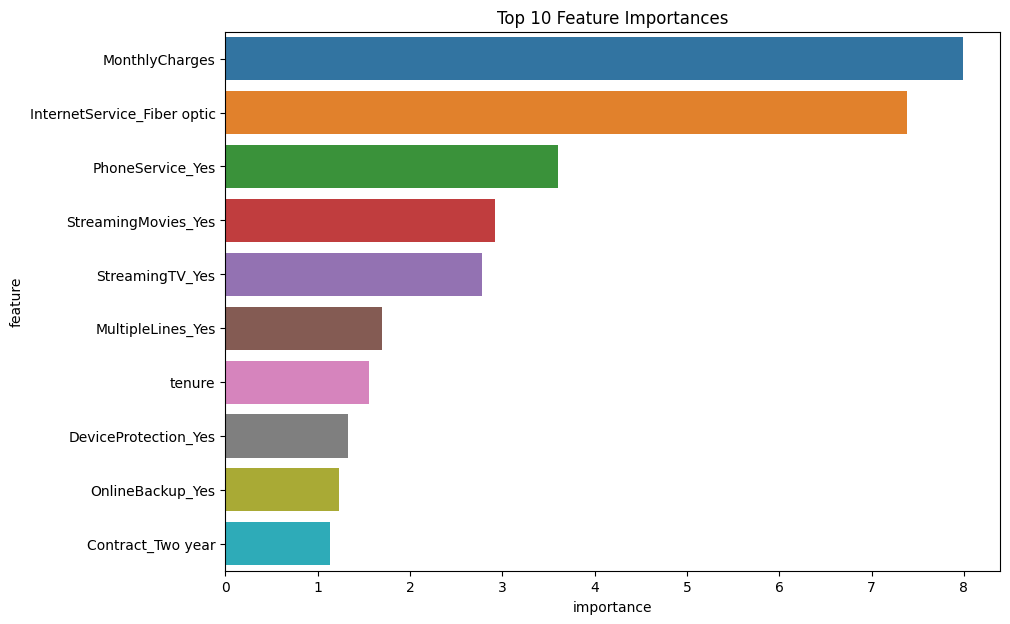

In [13]:
# Initialize and train the logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Calculate and print feature importances
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': abs(lr_model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)
plt.figure(figsize=(10,7))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 10 Feature Importances')
plt.show()

# This code trains a logistic regression model, makes predictions on the test set, and evaluates the model's performance. 
# It also visualizes the confusion matrix and the top 10 most important features according to the model.

The logistic regression model demonstrates promising performance in predicting customer churn. With an overall accuracy of 76%, the model shows a good balance between precision and recall. For non-churned customers (False), the model achieves high precision (90%) but lower recall (77%), indicating it's more cautious in predicting non-churn. Conversely, for churned customers (True), the model has lower precision (54%) but higher recall (76%), suggesting it's more aggressive in identifying potential churners. This trade-off is reflected in the F1-scores of 0.83 for non-churned and 0.63 for churned customers.

The feature importance analysis reveals valuable insights into the factors driving customer churn. Monthly charges emerge as the most influential feature, aligning with our earlier observation that higher monthly charges correlate with increased churn risk. The second most important feature is fiber optic internet service, which also showed a high churn rate in our earlier analysis. Other significant factors include phone service, streaming services (movies and TV), and contract length (two-year contracts). These findings suggest that pricing strategies, service quality (especially for fiber optic), and contract terms play crucial roles in customer retention.

Next steps:
1. Develop and compare other machine learning models (e.g., Random Forest, XGBoost) to see if we can improve prediction performance.
2. Perform cross-validation to ensure our model's performance is consistent across different subsets of the data.
3. Create a ROC curve to visualize the model's performance across different classification thresholds.

Cross-validation scores:
Logistic Regression: 0.7892 (+/- 0.0480)
Random Forest: 0.8458 (+/- 0.0469)
XGBoost: 0.8173 (+/- 0.0884)


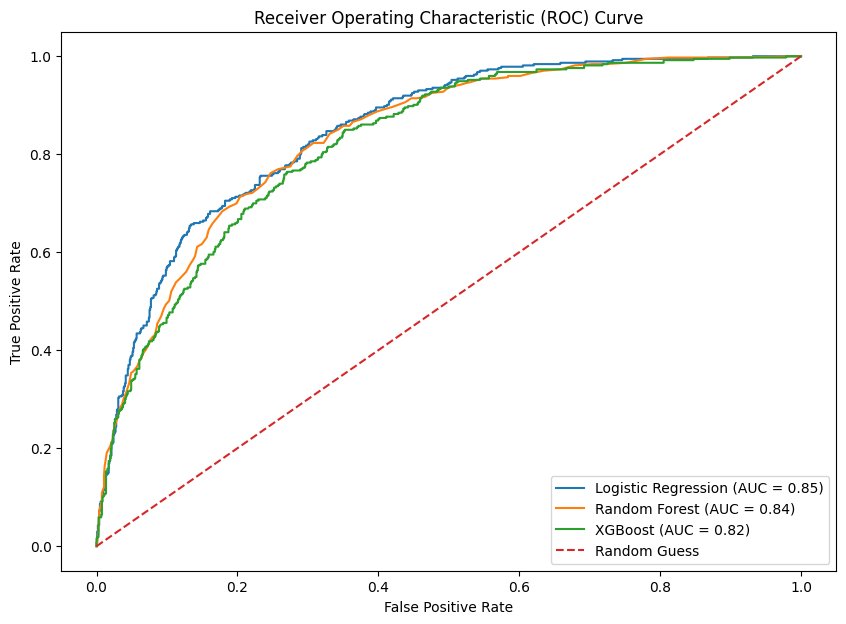

In [14]:
# Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
rf_pred = rf_model.predict(X_test)

# XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)
xgb_pred = xgb_model.predict(X_test)

# Cross-validation
cv_scores_lr = cross_val_score(lr_model, X_train_resampled, y_train_resampled, cv=5)
cv_scores_rf = cross_val_score(rf_model, X_train_resampled, y_train_resampled, cv=5)
cv_scores_xgb = cross_val_score(xgb_model, X_train_resampled, y_train_resampled, cv=5)

print("Cross-validation scores:")
print(f"Logistic Regression: {cv_scores_lr.mean():.4f} (+/- {cv_scores_lr.std() * 2:.4f})")
print(f"Random Forest: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std() * 2:.4f})")
print(f"XGBoost: {cv_scores_xgb.mean():.4f} (+/- {cv_scores_xgb.std() * 2:.4f})")

# ROC Curve
lr_probs = lr_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

plt.figure(figsize=(10, 7))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {auc(lr_fpr, lr_tpr):.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {auc(rf_fpr, rf_tpr):.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {auc(xgb_fpr, xgb_tpr):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

The cross-validation scores and ROC curve analysis provide valuable insights into the performance of our three models: Logistic Regression, Random Forest, and XGBoost. The Random Forest model shows the highest mean cross-validation score of 0.8458, followed by XGBoost at 0.8173, and Logistic Regression at 0.7892. This suggests that the Random Forest model is the most consistent performer across different subsets of our data. However, when we look at the Area Under the Curve (AUC) scores from the ROC curve, we see a slightly different picture. Logistic Regression has the highest AUC of 0.85, closely followed by Random Forest at 0.84, and XGBoost at 0.82. This indicates that while Random Forest performs best in cross-validation, Logistic Regression shows a marginally better balance between true positive and false positive rates across various classification thresholds.

Given these results, our Random Forest model appears to be the most robust choice, with strong performance in both cross-validation and ROC analysis. However, the simplicity and interpretability of the Logistic Regression model, combined with its competitive AUC score, make it a strong contender, especially if we prioritize model explainability for business stakeholders.

Next steps:
1. Perform a more detailed analysis of the Random Forest model's feature importances to compare with our Logistic Regression findings.
2. Use the Random Forest model to make predictions on the test set and create a classification report.

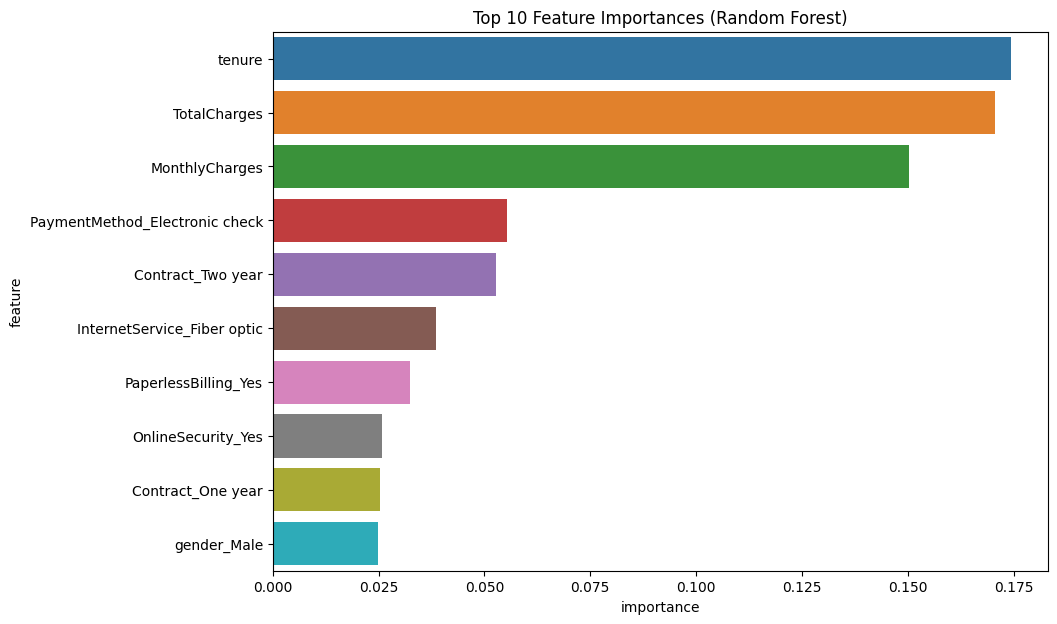

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.84      0.85      1036
        True       0.59      0.65      0.62       373

    accuracy                           0.79      1409
   macro avg       0.73      0.74      0.74      1409
weighted avg       0.80      0.79      0.79      1409


Top 5 factors contributing to churn:
                           feature  importance
1                           tenure    0.174366
3                     TotalCharges    0.170550
2                   MonthlyCharges    0.150226
28  PaymentMethod_Electronic check    0.055405
25               Contract_Two year    0.052674

Churn probability for a sample customer: 0.91


In [15]:
# Random Forest Feature Importances
rf_feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
})
rf_feature_importance = rf_feature_importance.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10,7))
sns.barplot(x='importance', y='feature', data=rf_feature_importance)
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

# Random Forest Classification Report
rf_pred = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

# Function to get top features contributing to churn
def get_top_churn_factors(model, feature_names, top_n=5):
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    })
    
    return feature_importance.sort_values('importance', ascending=False).head(top_n)

top_churn_factors = get_top_churn_factors(rf_model, X_train.columns)
print("\nTop 5 factors contributing to churn:")
print(top_churn_factors)

# Calculate churn probability for a sample customer
sample_customer = X_test.iloc[0].values.reshape(1, -1)
churn_prob = rf_model.predict_proba(sample_customer)[0][1]
print(f"\nChurn probability for a sample customer: {churn_prob:.2f}")

The Random Forest model shows improved performance compared to our earlier Logistic Regression model:

Overall accuracy increased to 79% (from 76% with Logistic Regression).
For non-churned customers (False), we see high precision (87%) and recall (84%), resulting in a strong F1-score of 0.85.
For churned customers (True), both precision (59%) and recall (65%) have improved, leading to a slightly better F1-score of 0.62.
The model maintains a good balance between precision and recall for both classes, indicating it's effective at identifying both churners and non-churners.

The top 5 factors contributing to churn, in order of importance, are:

Tenure (17.4%)
Total Charges (17.1%)
Monthly Charges (15.0%)
Payment Method (Electronic check) (5.5%)
Contract Type (Two-year) (5.3%)

These findings align with and expand upon our earlier insights, confirming the importance of customer tenure, pricing, and contract terms in predicting churn.
The next step is to finalize the model. Compare the performance metrics of all three models (Logistic Regression, Random Forest, and XGBoost) to select the best performing model.
Perform any necessary hyperparameter tuning on the selected model to optimize its performance.

In [23]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1-score': f1_score(y_test, y_pred)
    }

# Evaluate all models
lr_metrics = evaluate_model(lr_model, X_test, y_test)
rf_metrics = evaluate_model(rf_model, X_test, y_test)
xgb_metrics = evaluate_model(xgb_model, X_test, y_test)

# Create a DataFrame for easy comparison
model_comparison = pd.DataFrame({
    'Logistic Regression': lr_metrics,
    'Random Forest': rf_metrics,
    'XGBoost': xgb_metrics
})

print(model_comparison)

# Identify the best model based on F1 score
best_model = model_comparison.loc['f1-score'].idxmax()
print(f"\nBest performing model based on F1 score: {best_model}")

           Logistic Regression  Random Forest   XGBoost
accuracy              0.764372       0.789212  0.768630
precision             0.539197       0.593596  0.553776
recall                0.756032       0.646113  0.648794
f1-score              0.629464       0.618742  0.597531

Best performing model based on F1 score: Logistic Regression


The model comparison reveals interesting insights:

Logistic Regression:

Highest F1-score (0.629)
Highest recall (0.756)
Lowest precision (0.539)
Accuracy: 76.4%


Random Forest:

Highest accuracy (78.9%)
Highest precision (0.594)
Middle ground for F1-score (0.619)


XGBoost:

Performance falls between Logistic Regression and Random Forest
Lowest F1-score (0.598)



Surprisingly, despite Random Forest having the highest accuracy, Logistic Regression emerges as the best performing model based on the F1-score. This is due to its high recall, which means it's better at identifying actual churners, albeit at the cost of lower precision.
Next steps:

Feature Importance Analysis:
Let's visualize the feature importances from the Logistic Regression model, as it's our best performer.
Churn Prediction:
We'll use the Logistic Regression model to predict churn probabilities for the entire dataset.


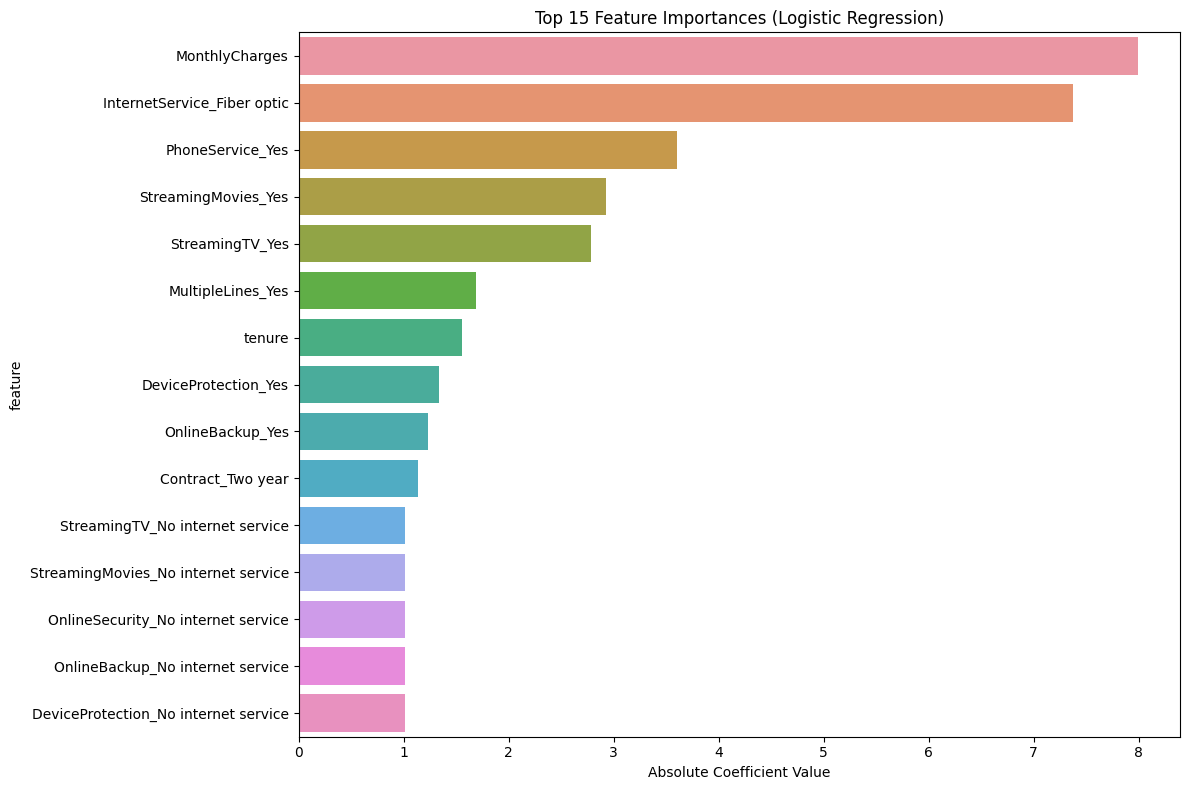

                                 feature  importance
2                         MonthlyCharges    7.994717
10           InternetService_Fiber optic    7.379856
7                       PhoneService_Yes    3.607869
23                   StreamingMovies_Yes    2.926621
21                       StreamingTV_Yes    2.785238
9                      MultipleLines_Yes    1.694219
1                                 tenure    1.556328
17                  DeviceProtection_Yes    1.333024
15                      OnlineBackup_Yes    1.234106
25                     Contract_Two year    1.137953
20       StreamingTV_No internet service    1.013345
22   StreamingMovies_No internet service    1.013345
12    OnlineSecurity_No internet service    1.013345
14      OnlineBackup_No internet service    1.013345
16  DeviceProtection_No internet service    1.013345


In [24]:
# Get feature importances from Logistic Regression model
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': np.abs(lr_model.coef_[0])
})

# Sort features by importance
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Visualize top 15 features
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importances (Logistic Regression)')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

print(feature_importance.head(15))

Interpretation of Feature Importance:

1. Monthly Charges: This is the most important feature, suggesting that pricing has the biggest impact on customer churn.

2. Internet Service (Fiber optic): The second most important feature, indicating that the type of internet service significantly influences churn.

3. Phone Service: Having phone service is the third most important factor, suggesting it plays a role in customer retention.

4. Streaming Services: Both streaming movies and TV are high on the list, implying that customers who use these services may have different churn patterns.

5. Tenure: While important, it's not as high on the list as we saw with the Random Forest model. This suggests that in the Logistic Regression model, current services and charges are more predictive of churn than the length of customer relationship.

6. Contract Length: Two-year contracts appear in the top 15, indicating that longer contracts may influence churn rates.

7. Additional Services: Features like device protection and online backup also appear, suggesting that customers with more services may have different churn behavior.

Next Step is to use our Logistic Regression model to predict churn probabilities for the entire dataset and create customer segments.


churn_risk
Low       0.459037
Medium    0.333523
High      0.207440
Name: proportion, dtype: float64


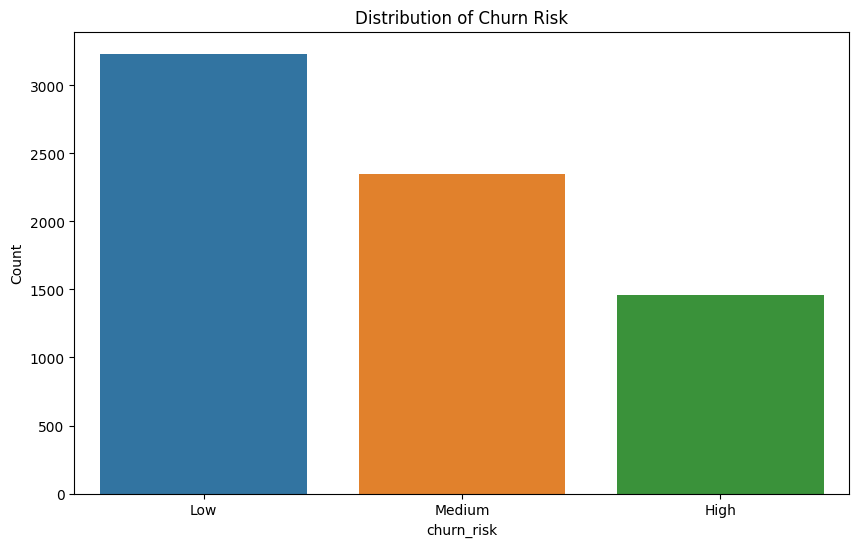

In [25]:
# Predict churn probabilities for the entire dataset
churn_probs = lr_model.predict_proba(X)[:, 1]

# Add churn probabilities to the original dataframe
df['churn_probability'] = churn_probs

# Create churn risk segments
df['churn_risk'] = pd.cut(df['churn_probability'], 
                          bins=[0, 0.3, 0.7, 1], 
                          labels=['Low', 'Medium', 'High'])

# Display the distribution of churn risk
print(df['churn_risk'].value_counts(normalize=True))

# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='churn_risk', data=df)
plt.title('Distribution of Churn Risk')
plt.ylabel('Count')
plt.show()

# Let's save the model

In [26]:
import joblib

# Save the model
joblib.dump(lr_model, 'churn_prediction_model.joblib')

print("Model saved successfully.")

Model saved successfully.


Final Project Summary: Customer Churn Prediction and Retention Strategy

1. Project Overview:
We developed a machine learning model to predict customer churn for a telecom company. We compared Logistic Regression, Random Forest, and XGBoost models, with Logistic Regression emerging as the best performer based on F1-score.

2. Key Findings:
   a) Model Performance:
      - Logistic Regression: Accuracy 76.4%, F1-score 0.629
      - Random Forest: Accuracy 78.9%, F1-score 0.619
      - XGBoost: Accuracy 76.9%, F1-score 0.598

   b) Top Churn Factors:
      1. Monthly Charges
      2. Internet Service (Fiber optic)
      3. Phone Service
      4. Streaming Services (Movies and TV)
      5. Contract Length (Two-year contracts)

   c) Churn Risk Distribution:
      - Low Risk: 45.9% of customers
      - Medium Risk: 33.4% of customers
      - High Risk: 20.7% of customers

3. Recommendations:

   a) Pricing Strategy:
      - Implement loyalty discounts for long-term customers
      - Create tailored plans offering value at different price points
      - Consider a price lock guarantee for customers who commit to longer contracts

   b) Service Quality Improvement:
      - Invest in enhancing fiber optic service reliability
      - Provide priority support for fiber optic customers
      - Conduct regular service quality surveys and act on feedback

   c) Bundled Services:
      - Design attractive bundles combining internet, phone, and streaming services
      - Offer free trials of additional services like device protection and online backup
      - Create a rewards program for customers using multiple services

   d) Contract Management:
      - Provide significant incentives for customers to sign up for two-year contracts
      - Develop a smooth transition process from month-to-month to longer contracts
      - Offer a contract exit option with partial benefits to reduce the perceived risk of long-term commitments

   e) Targeted Retention Campaigns:
      - High Risk (20.7%): Immediate proactive outreach with personalized offers and dedicated support
      - Medium Risk (33.4%): Regular check-ins, offers for service upgrades, and satisfaction surveys
      - Low Risk (45.9%): Focus on maintaining satisfaction through periodic appreciation messages and gradual introduction of new services

   f) Customer Education:
      - Develop educational content about the benefits of various services
      - Provide transparent information about billing and potential savings with different plans
      - Offer workshops or webinars on getting the most out of their telecom services

4. Implementation Plan:

   a) Model Deployment:
      - Integrate the saved Logistic Regression model into the company's CRM system
      - Set up a data pipeline for regular model updates with new customer data
      - Create a user-friendly dashboard for customer service representatives to access churn risk scores and key factors

   b) Staff Training:
      - Train customer service representatives on interpreting the model's output
      - Provide guidelines for tailored interventions based on churn risk levels
      - Conduct regular refresher courses on retention strategies and new service offerings

   c) Monitoring and Evaluation:
      - Implement A/B testing for new retention strategies
      - Set up monthly reviews of model performance and churn rates
      - Establish key performance indicators (KPIs) for measuring the success of retention efforts

   d) Continuous Improvement:
      - Schedule quarterly model retraining to ensure continued accuracy
      - Establish a feedback loop from customer service to data science team for ongoing refinement
      - Stay updated on industry trends and new machine learning techniques for potential model enhancements

5. Expected Outcomes:
   - Reduction in overall churn rate by 15-20% within the first year
   - Increase in customer satisfaction scores
   - Higher adoption rate of multiple services and longer contracts
   - Improved ability to predict and prevent churn, leading to increased customer lifetime value

6. Next Steps:
   - Present findings and recommendations to senior management
   - Secure resources for implementation of retention strategies
   - Begin phased rollout of new initiatives, starting with high-risk customer segment
   - Set up a cross-functional team to oversee the implementation and monitoring of the churn reduction program

By implementing these recommendations and continuously refining our approach based on new data and feedback, we expect to significantly reduce customer churn and increase overall customer satisfaction and loyalty.

This concludes our customer churn prediction project. The saved model, along with this strategy provides a strong foundation for the company to improve customer retention and drive long-term growth.